<a href="https://colab.research.google.com/github/LestyMV/Income-inequality-in-relation-to-GDP/blob/main/Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_gini = pd.read_csv("/content/economic-inequality-gini-index.csv")
df_gini. head()

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605


In [37]:
df_gdp = pd.read_csv("/content/gdp-per-capita-worldbank.csv")
df_gdp = df_gdp.rename(columns={
  "GDP per capita, PPP (constant 2017 international $)": "GDP per capita"})
df_gdp.head()

,Entity,Code,Year,GDP per capita
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062


In [38]:
df_gidp=pd.merge(df_gini, df_gdp, how="outer", on=['Entity','Year'])
df_gidp

,Entity,Code_x,Year,Gini coefficient,Code_y,GDP per capita
0,Albania,ALB,1996,0.270103,ALB,4908.939453
1,Albania,ALB,2002,0.317390,ALB,6753.890625
2,Albania,ALB,2005,0.305957,ALB,8040.092773
3,Albania,ALB,2008,0.299847,ALB,9912.162109
4,Albania,ALB,2012,0.289605,ALB,11227.966797
...,...,...,...,...,...,...
6499,Zimbabwe,NaN,2014,NaN,ZWE,3703.897217
6500,Zimbabwe,NaN,2015,NaN,ZWE,3707.622559
6501,Zimbabwe,NaN,2016,NaN,ZWE,3678.217041
6502,Zimbabwe,NaN,2018,NaN,ZWE,3923.030518


In [39]:
df_gidp_1 =df_gidp.drop([ 'Code_x', 'Code_y'], axis=1)

In [40]:
#countries in the world of which both numbers are available
df_gidp_2 = df_gidp_1.dropna()
df_gidp_2

,Entity,Year,Gini coefficient,GDP per capita
0,Albania,1996,0.270103,4908.939453
1,Albania,2002,0.317390,6753.890625
2,Albania,2005,0.305957,8040.092773
3,Albania,2008,0.299847,9912.162109
4,Albania,2012,0.289605,11227.966797
...,...,...,...,...
2120,Zambia,2010,0.556215,3125.528809
2121,Zambia,2015,0.571361,3443.553223
2122,Zimbabwe,2011,0.431536,3203.870605
2123,Zimbabwe,2017,0.443371,3795.642334


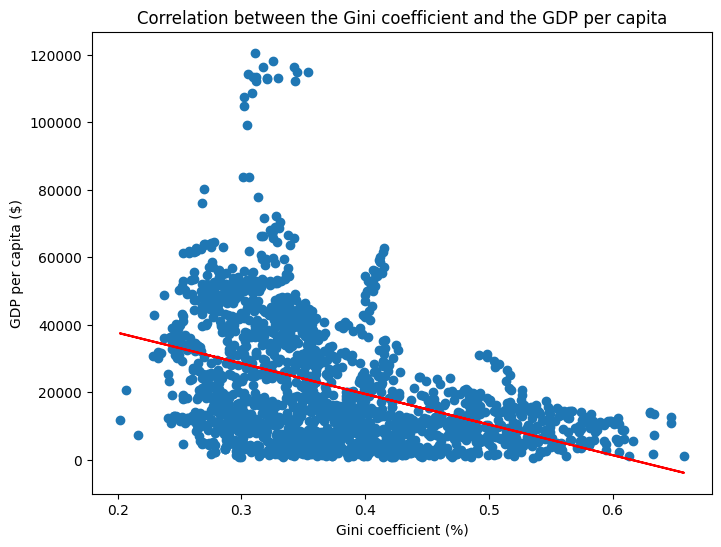

PearsonRResult(statistic=-0.41967256865657165, pvalue=3.615944534782433e-77)

In [65]:
# scatterplot with linear regression line
# calculate Pearson correlation based on all the data from all countries

from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x=df_gidp_2['Gini coefficient'], y=df_gidp_2['GDP per capita']);

ax.set_xlabel('Gini coefficient (%)')
ax.set_ylabel('GDP per capita ($)')
ax.set_title('Correlation between the Gini coefficient and the GDP per capita');

b, m = polyfit(df_gidp_2['Gini coefficient'], df_gidp_2['GDP per capita'], 1)
plt.plot(df_gidp_2['Gini coefficient'], b + m * df_gidp_2['Gini coefficient'], '-', color='red')

plt.show()

pearson_corr= pearsonr(df_gidp_2['Gini coefficient'], df_gidp_2['GDP per capita'])
pearson_corr


There is a negligible correlation of -0.41 between the Gini coefficient and the GDP of a country over the years (1990-2020). This means that in some cases the higher the GDP, the lower the Gini coefficient. However, this could fluctuate over the years and differences per country could exist as well.

In [74]:
# group data per year, to see if the correlation change.

list_of_yrs = df_gidp_2['Year'].unique().tolist()
list_of_yrs.sort()
print(list_of_yrs)

df_per_yr = df_gidp_2.groupby(['Year'])

def get_correlation(year):

  corr_year = df_per_yr.get_group(year).corr().iloc[1,2]
  return corr_year

corr_per_yr_list = [get_correlation(year) for year in list_of_yrs]
print(corr_per_yr_list)



[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[-0.17583809520566648, -0.6110837621535542, -0.4477952411028513, -0.32335560406233854, -0.5809490814381967, -0.4422849546537632, -0.2957694049555469, -0.4829096656886665, -0.3238198907519846, -0.29691541150366363, -0.48388037929042477, -0.2579396133982492, -0.26101748343622294, -0.4443312246771709, -0.42954455951571174, -0.47628524733043204, -0.46904674978518884, -0.40195079637889275, -0.4623335154142001, -0.4243187115278085, -0.40992071027917887, -0.3914743643782614, -0.3781610477859261, -0.39733441736766656, -0.3864924499149576, -0.38785468981036614, -0.39381179002912553, -0.3880811234587224, -0.34849701400964134, -0.3308552443907312, 0.07945147457156601]


In [75]:
df_corr_year = pd.DataFrame(list(zip(list_of_yrs, corr_per_yr_list )), columns = ['year', 'pearson correlation'])
df_corr_year

,year,pearson correlation
0,1990,-0.175838
1,1991,-0.611084
2,1992,-0.447795
3,1993,-0.323356
4,1994,-0.580949
5,1995,-0.442285
6,1996,-0.295769
7,1997,-0.482910
8,1998,-0.323820
9,1999,-0.296915


The maximum correlation is 0.07945147457156601, the minumum correlation is -0.6110837621535542


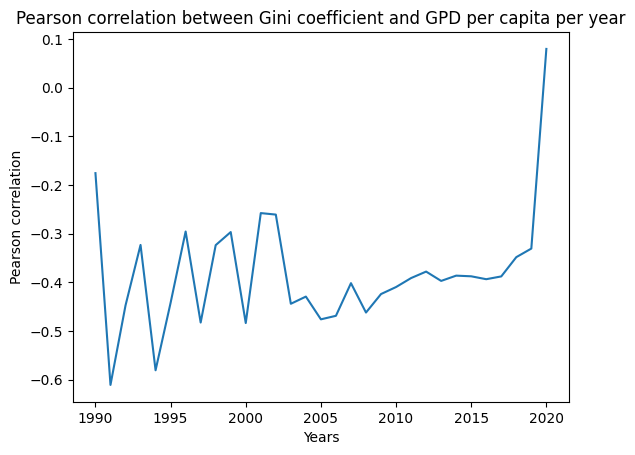

In [79]:
max = df_corr_year['pearson correlation'].max()
min = df_corr_year['pearson correlation'].min()

print(f'The maximum correlation is {max}, the minumum correlation is {min}' )

fig, ax = plt.subplots()

ax.plot(df_corr_year['year'], df_corr_year['pearson correlation'])
plt.xlabel('Years')
plt.ylabel('Pearson correlation')
plt.title('Pearson correlation between Gini coefficient and GPD per capita per year')
plt.show()

There seems to be some fluctation over the years, however, the correlation is still negative in most of the years and negligible between -0.61 and 0.22. And only in 2020 does it change to a positive correlaion of 0.08.

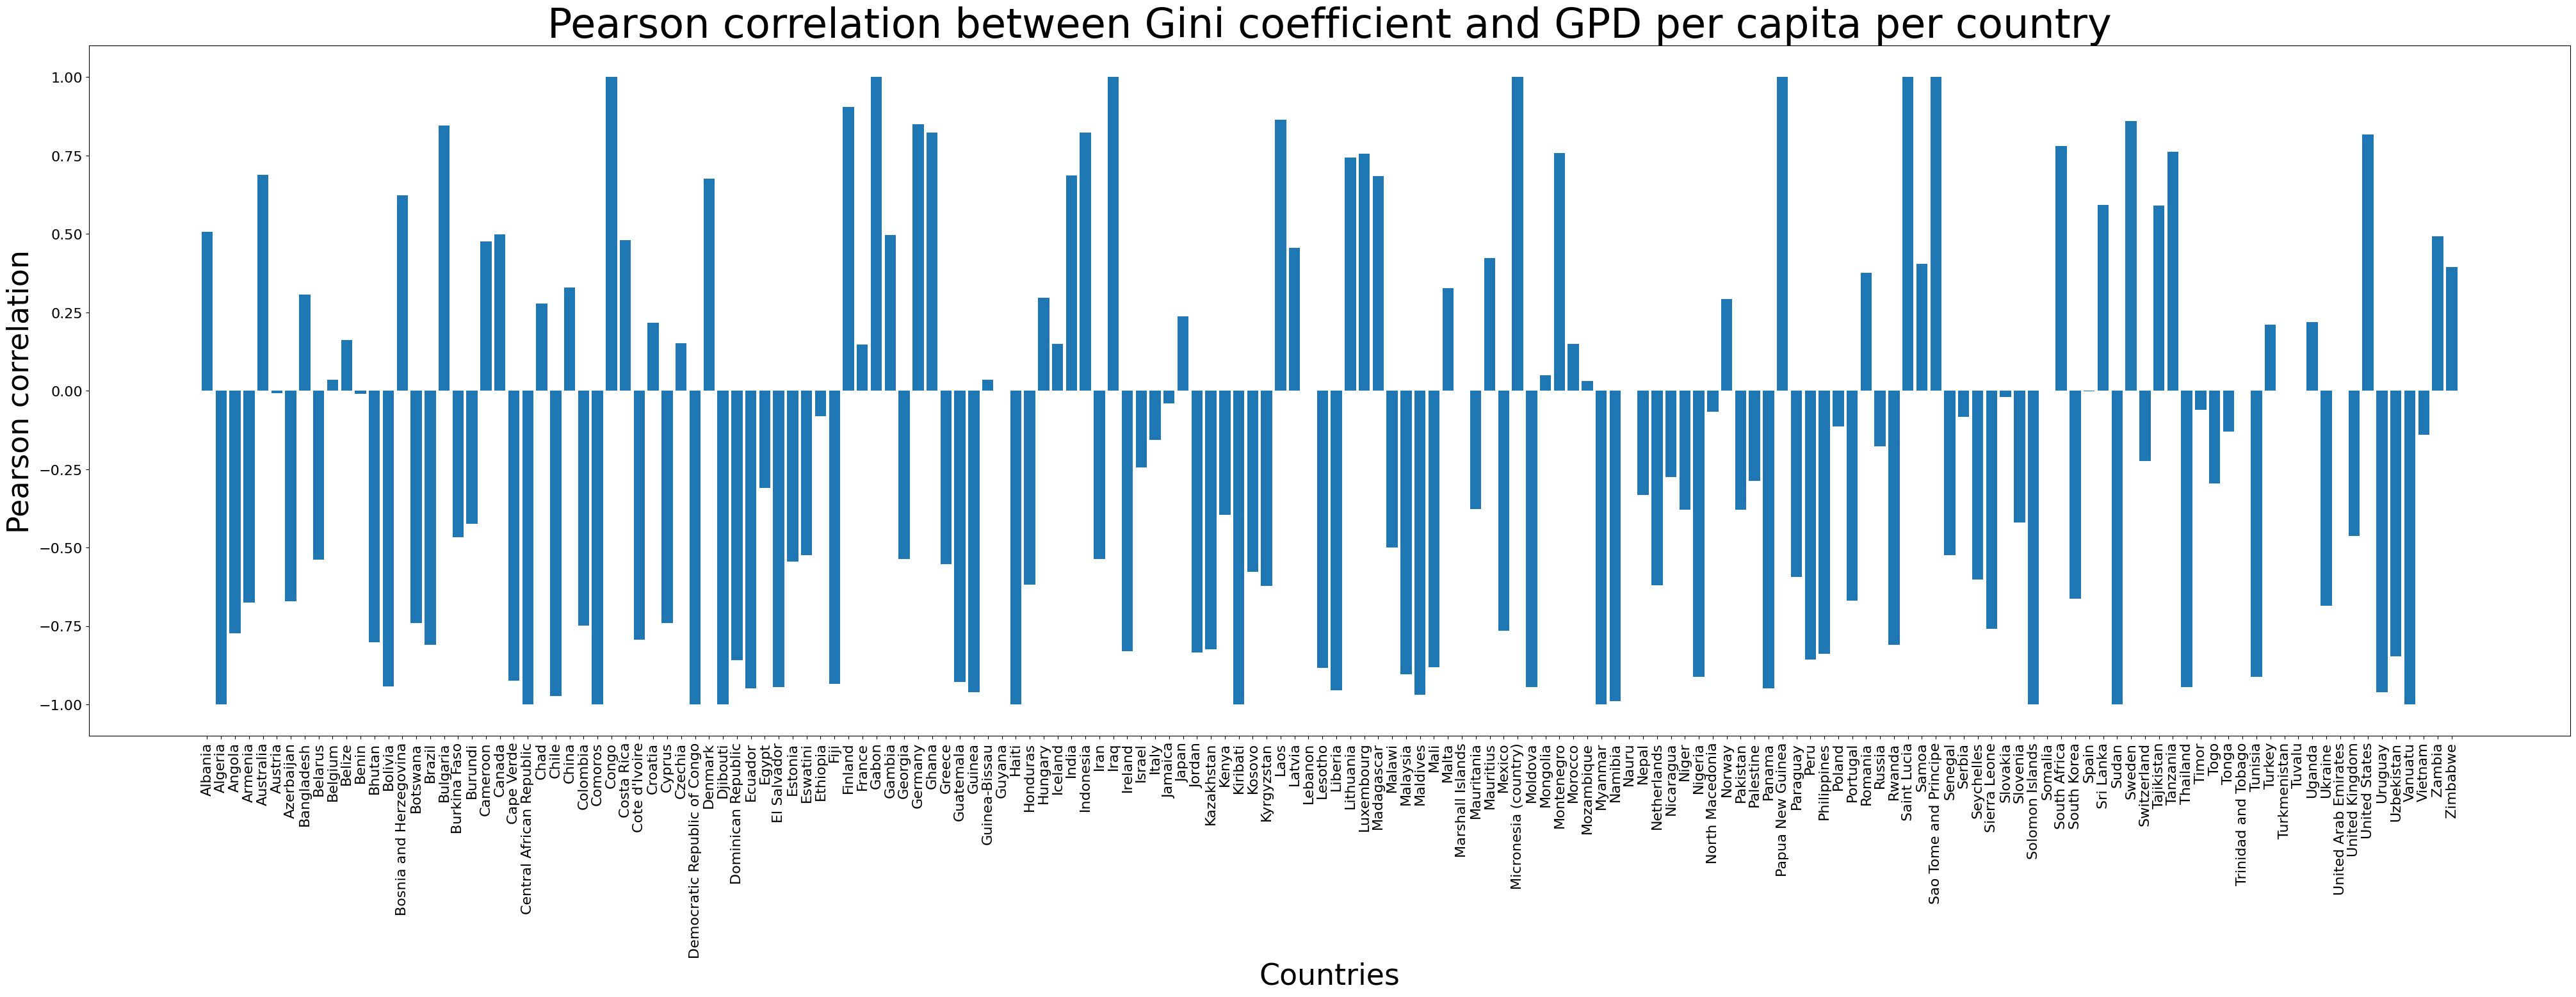

In [91]:
# group data per country, to see if the correlation change.

list_of_countries = df_gidp_2['Entity'].unique().tolist()
list_of_countries.sort()
#print(list_of_countries)

df_per_country = df_gidp_2.groupby(['Entity'])

def get_correlation_country(country):

  corr_country = df_per_country.get_group(country).corr().iloc[1,2]
  return corr_country

corr_per_country_list = [get_correlation_country(country) for country in list_of_countries]
#print(corr_per_country_list)

df_corr_country = pd.DataFrame(list(zip(list_of_countries, corr_per_country_list )), columns = ['country', 'pearson correlation'])
#df_corr_country

fig, ax = plt.subplots()

ax.bar(df_corr_country['country'], df_corr_country['pearson correlation'])
plt.xlabel('Countries', fontsize = 33)
plt.ylabel('Pearson correlation', fontsize = 33)
plt.title('Pearson correlation between Gini coefficient and GPD per capita per country', fontsize = 46 )
fig.set_size_inches(50, 14)
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)

plt.show()

Some countries show a positive correlation and some countries show a negative correlation between Gini and GDP but still negligible. Negative correlations seem to occur more often, so this explains why the overall correlation is negative.